## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Helper Functions - For plotting 

In [2]:
#to vualize the decision tree of scikit learn model
from util import visualize_tree_boundries

In [3]:
def plot2D(
    X,
    y=None,
    feature_names=['Length(cm)', 'Weight(kg)'],
    target_names=['diamondfin', 'bubblefish', 'crosstail'],
    title=None,
    vertical_boundry=0,
    horizontal_boundry=0
):
    """
    Plots a 2D scatter of two features, supporting both NumPy arrays and Pandas DataFrames.

    Parameters
    ----------
    X : np.ndarray or pd.DataFrame
        Feature matrix with at least two columns.
    y : np.ndarray, pd.Series, or None
        Target labels (optional).
    feature_names : list of str
        Names of the two features to display on axes.
    target_names : list of str
        Labels for each target class.
    title : str or None
        Plot title.
    vertical_boundry : float
        Position of vertical decision boundary.
    horizontal_boundry : float
        Position of horizontal decision boundary.
    """
    
    # Convert X to numpy array if it's a DataFrame
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Convert y to numpy array if it's a Series or DataFrame
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y = np.ravel(y.values)

    colors = ['red', 'blue', 'orange']
    markers = ['d', 'o', 'x']

    plt.figure(figsize=(6, 4))

    if y is None:
        plt.scatter(X[:, 0], X[:, 1])
    else:
        for i, target_name in enumerate(target_names):
            color = colors[i % len(colors)]
            marker = markers[i % len(markers)]
            plt.scatter(
                X[y == i, 0],
                X[y == i, 1],
                label=f"{target_name} - Label {i}",
                color=color,
                marker=marker
            )

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()

    # Draw vertical boundary (full height)
    plt.axvline(x=vertical_boundry, color='red', linestyle='--')

    # Draw horizontal boundary only to the right of the vertical line
    x_right = plt.xlim()[1]
    plt.hlines(y=horizontal_boundry, xmin=vertical_boundry, xmax=x_right, color='blue', linestyle='--')

    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()


## 1. Load Data

#### load `data.csv` file with pandas read_csv function

In [4]:
#your code here
df = pd.read_csv('data.csv')

#### Asing the features (`Length(cm)` and	`Weigtht(kg)`) to variable `X` and target to variable `y`

In [7]:
X = df[['Length(cm)', 'Weight(kg)']]
y = df['Label']

In [8]:
target_names = ['diamondfin', 'bubblefish', 'crosstail']
feature_names = ['Length(cm)', 'Weight(kg)']

## Another illustration of Machine Learning Process



<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week12_DecisionTree/assets/ml_flow.webp" width="400" height="450" />
</div>

### Plot X and y scatter plot 

#### Note: you can use `plot2D` helper function

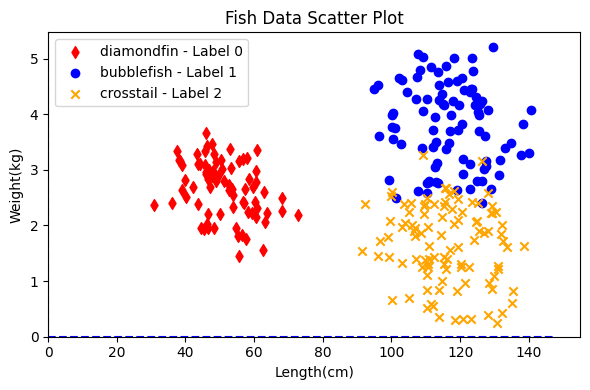

In [9]:
plot2D(
    X,
    y,
    feature_names,
    target_names,
    title='Fish Data Scatter Plot'
)

## 2. Split Data into Train and Test Sets

In [10]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

## 3. Design your baseline model 

### What is the accuracy of your random guessing model?

In [13]:
#33% accuracy?
random_accuracy = y_test.value_counts().max() / len(y_test)
print(f"Random Classifier Accuracy: {random_accuracy:.2f}%")

Random Classifier Accuracy: 0.38%


### Design a better base model with KNN (`n_neighbors=3`)

In [15]:
# your code here
model_base = KNeighborsClassifier(n_neighbors=3)
model_base.fit(X_train, y_train)

base_pred = model_base.predict(X_test)
print(f"KNN Classifier Accuracy: {accuracy_score(y_test, base_pred):.2f}%")

KNN Classifier Accuracy: 0.93%


**This is the model you want to beat with your Decision Tree implementation (maybe).**

# 4. Decison Tree From Scratch

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week12_DecisionTree/assets/decisiontree_visual.jpg" width="600" hight="200" /> 

### High level instructions

- ✅ Split data into train and test sets with `test_size=0.3`.
- ✅ Desing KNN classifier to desing your baseline model.
- Plot the **training data** and identify decision boundaries.

    - Use the `plot2D` helper function and decide on `length_threshold` and `weight_threshold` values by looking at the data.

- Display the training data and decision boundaries on the same plot.

    - Use the `plot2D` helper function again, and pass `length_threshold` as `vertical_boundry` and `weight_threshold` as `horizontal_boundry`.

- Write the logic of your decision tree with `if-else` statements.

In [15]:
#your code for first plot here

In [16]:
#your code here 
length_threshold = None
weight_threshold = None

In [17]:
#your code for the second plot here (with vertical and horizontal boundries)

In [18]:
#your code here
# Write the logic of your decision tree with `if-else` statements
def my_decision_tree(X_new):
    predictions = []
    # your code here

    return np.array(predictions)

## 5. Evaluate your model

#### - Make prediction for the test data using `my_decision_tree` function
#### - `Plot2D` `X_test` once with `y_test` labels and once with `y_pred` labels 

#### Can you see difference especially in overlapping areas?

#### - Calculate the accuracy of your model using `accuracy_score` function from sklearn.metrics

In [ ]:
y_pred = None

In [ ]:
accuracy = accuracy_score(None, None)
print(f"My Decision Tree Model Accuracy: {accuracy}")   

# 6. Decision Tree with Sklearn

#### Training step

In [ ]:
model = DecisionTreeClassifier()
#your code here - train the model with your training data


In [ ]:
# visualize the tree diagram
plt.figure(figsize=(16,10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=target_names, fontsize=10)
plt.show()

In [ ]:
# Visualize the decision boundaries
fig, ax = plt.subplots(figsize=(10, 6))
visualize_tree_boundries(model, X_train, y_train, ax=ax)

#### Testing the model

In [32]:
# y_pred = ?

#### Confusion Matrix: identify which labels are predicted correctly and which are not


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(None, None)

#### Repeat the process above with `DecisionTreeClassifier(max_depth=2)`

In [34]:
#Define and train the mode


In [35]:
#visualize the decision tree diagram


In [36]:
# visualize the decision boundaries


In [37]:
# validate the model with the test data; accuracy_score and confusion_matrix
# Visualize the decision boundaries


#### Find the optimal `max_depth` value for your model using a loop from 1 to 5

In [38]:
# your code here

### Practice Questions

 1.  What are the advantages and disadvantages of Decision Trees?
 2. What is the `confusion matrix` and how is it used?
 3. How do you `evaluate` the performance of a machine learning model?
 4. What is the purpose of `hyperparameter tuning`?